In [2]:
# https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# df = pd.read_csv("./cleaned_soccer_data_v1.csv",index_col=0)
df = pd.read_csv("../../datasets/cleaned_soccer_data_120K.csv")
print(df.head())
print(df.columns)
print(df["player_positions_general"])



   sofifa_id         short_name                            long_name  \
0     158023           L. Messi       Lionel Andrés Messi Cuccittini   
1      20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
2       9014          A. Robben                         Arjen Robben   
3      41236     Z. Ibrahimović                   Zlatan Ibrahimović   
4     167495           M. Neuer                         Manuel Neuer   

          dob  height_cm  weight_kg  overall  potential  weak_foot  \
0  1987-06-24        169         67       93         95          3   
1  1985-02-05        185         80       92         92          4   
2  1984-01-23        180         80       90         90          2   
3  1981-10-03        195         95       90         90          4   
4  1986-03-27        193         92       90         90          4   

   skill_moves  ...  rwb  lb  lcb  cb  rcb  rb   gk  player_positions  \
0            4  ...   62  54   45  45   45  54    0                CF   


In [3]:
player_positions_general=df["player_positions_general"]
player_positions_detailed = df["player_positions"]
fifa_id = df["sofifa_id"]

df.drop("player_positions_general",1)
ohe_positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df = df.drop("player_positions",1)
df = df.drop("player_positions_general",1)
df = df.drop(['sofifa_id','short_name','long_name','dob','fifa'],1)

In [4]:
# drop if we dont want features in the labels
df = df.drop(ohe_positions,1)

In [5]:
# ensure all columns are numeric
print(df.dtypes)

height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acceleration           int64
movement_sprint_speed           int64
movement_agility                int64
movement_reactions              int64
movement_bal

In [6]:
player_positions_general
player_positions_general.unique()

array(['ATK', 'MID', 'GK', 'DEF'], dtype=object)

In [40]:
clf = LinearDiscriminantAnalysis()
df_lda = clf.fit_transform(df,player_positions_detailed)

df_lda

array([[-4.57763113, -7.63124583, -0.73175   , ..., -0.11043386,
         0.43697848,  0.05022611],
       [-4.13014615, -7.18460144, -2.34510818, ...,  0.12290131,
        -0.35014857,  0.11138445],
       [-4.03795893, -5.95080984,  0.41198173, ...,  0.15125997,
        -0.33551138,  0.07292912],
       ...,
       [-1.89442958,  2.61667116, -1.60656811, ...,  0.08144278,
         0.24497381, -0.16544342],
       [-3.44234613,  1.08571593,  0.51775361, ...,  0.0391755 ,
        -0.10321505, -0.16686203],
       [-3.31944665,  0.27004223,  0.72285114, ..., -0.44400521,
         0.01193386, -0.18980332]])

In [33]:
df_lda.shape


(121409, 49)

<ipython-input-12-283b646b18e6>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):
d:\projects\python_projects\data_mining\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


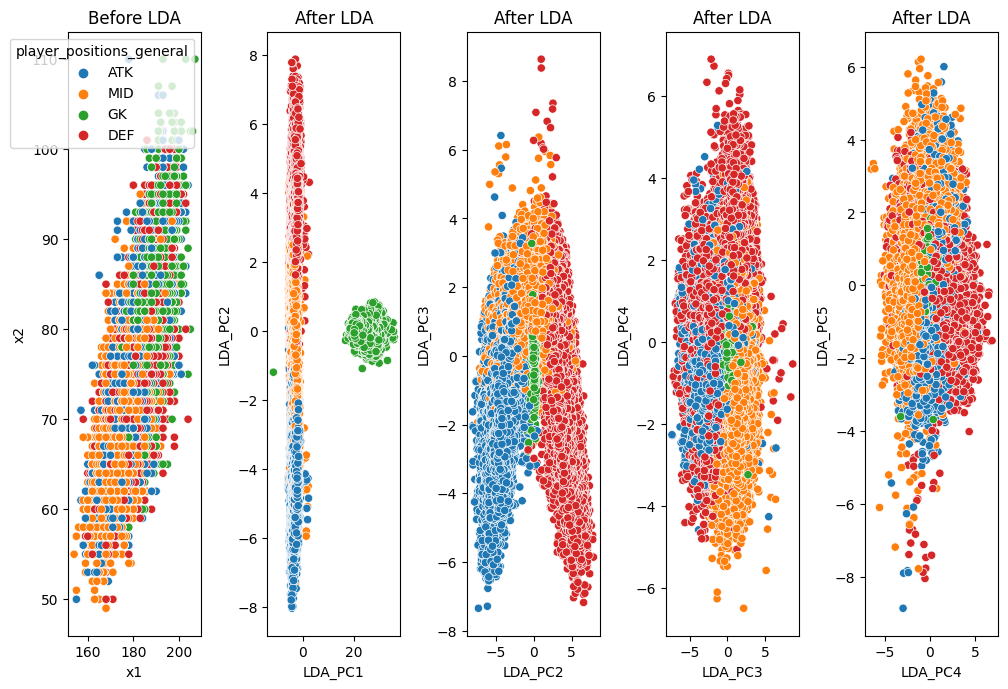

In [12]:
def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):
    fig, axes = plt.subplots(1,num_pc)
    if not labels.empty:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=labels,ax=axes[0])
    else:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1],ax=axes[0])
    axes[0].set_xlabel('x1')
    axes[0].set_ylabel('x2')
    axes[0].set_title('Before LDA')
    for i in range(1,num_pc):
        if not labels.empty:
            sns.scatterplot(data=df_pca, x=df_pca[:,i-1], y=df_pca[:,i], hue=labels,ax=axes[i],legend=False)
        else:
            sns.scatterplot(data=df, x=df_pca[:,i-1], y=df_pca[:,i],ax=axes[i],legend=False)
        axes[i].set_xlabel('LDA_PC{}'.format(i))
        axes[i].set_ylabel('LDA_PC{}'.format(i+1))
        axes[i].set_title('After LDA')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
# scatter_pca_sns(df,df_pca,num_pc,labels=player_positions_detailed)
scatter_lda_sns(df,df_lda,5,labels=player_positions_general)

In [10]:

# def biplot(df,score,coeff,num_pc,labels=None):
#     '''
#     score: the projected data
#     coeff: the eigenvectors (PCs)
#     pcax: pca1 index
#     pcay: pca2 index
#     '''
#     for i in range(0,num_pc-1):
#         pca1=i
#         pca2=i+1
#         xs = score[:,i]
#         ys = score[:,i+1]
#         n=coeff.shape[0]
#         scalex = 1.0/(xs.max()- xs.min())
#         scaley = 1.0/(ys.max()- ys.min())
#         if labels is None:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley)
#         else:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley, hue=labels)
#         for j in range(n): #feature explain variance
#             plt.arrow(0, 0, coeff[j,pca1], coeff[j,pca2],color='r',alpha=0.9) 
#             if labels is None:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15,  list(df.columns)[j], color='g', ha='center', va='center')
#             else:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15, list(df.columns)[j], color='g', ha='center', va='center')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.xlabel("LDA_PC{}".format(pca1+1))
#         plt.ylabel("LDA_PC{}".format(pca2+1))
#         plt.grid()
#         plt.show()

# # Call the biplot function for any number of PCs
# biplot(df,df_pca, np.transpose(pca.components_),df_pca.shape[1],player_positions_general)


In [41]:
# normalize pca to unit norm
from sklearn import preprocessing
df_lda = preprocessing.normalize(df_lda, norm='l2')

In [42]:
columns=["LDA_PC{}".format(i) for i in range(1,df_lda.shape[1]+1)]
df_lda = pd.DataFrame(df_lda,columns=columns,index=df.index)
df_lda.head()

,LDA_PC1,LDA_PC2,LDA_PC3,LDA_PC4,LDA_PC5,LDA_PC6,LDA_PC7,LDA_PC8,LDA_PC9,LDA_PC10,...,LDA_PC40,LDA_PC41,LDA_PC42,LDA_PC43,LDA_PC44,LDA_PC45,LDA_PC46,LDA_PC47,LDA_PC48,LDA_PC49
0,-0.382424,-0.637529,-0.061132,0.108587,0.227719,0.168405,0.100296,0.021643,-0.290372,0.155309,...,0.041078,-0.056679,-0.063375,0.083037,-0.034669,0.017492,0.014680,-0.009226,0.036506,0.004196
1,-0.365820,-0.636363,-0.207714,0.117502,0.152070,-0.067082,0.226367,-0.022900,-0.096832,0.321931,...,0.049858,0.002526,0.079646,0.013624,0.032882,0.005498,-0.017856,0.010886,-0.031014,0.009866
2,-0.373282,-0.550113,0.038085,0.116814,0.288505,0.175069,0.208439,-0.012166,-0.134264,-0.047862,...,-0.057723,0.040941,-0.091407,0.040220,-0.139366,0.028564,0.018493,0.013983,-0.031016,0.006742
3,-0.342108,-0.559788,-0.200575,-0.097381,0.140146,-0.026074,0.131959,0.062310,-0.144501,0.120712,...,0.008674,0.053356,0.201632,0.009189,-0.018229,0.020588,0.007804,-0.024966,-0.017747,0.017009
4,0.964314,0.007107,-0.019697,0.024679,-0.013309,-0.017005,0.053672,0.017355,-0.025523,0.063053,...,0.020142,-0.040031,0.027274,0.044741,-0.087486,0.010861,-0.041327,0.091179,-0.056487,-0.061126


In [43]:
r = df_lda.iloc[0,:].apply(lambda x: x**2)
np.sum(r)

1.0000000000000002

In [44]:
df_lda = df_lda.astype(np.float32)
df_lda.dtypes

LDA_PC1     float32
LDA_PC2     float32
LDA_PC3     float32
LDA_PC4     float32
LDA_PC5     float32
LDA_PC6     float32
LDA_PC7     float32
LDA_PC8     float32
LDA_PC9     float32
LDA_PC10    float32
LDA_PC11    float32
LDA_PC12    float32
LDA_PC13    float32
LDA_PC14    float32
LDA_PC15    float32
LDA_PC16    float32
LDA_PC17    float32
LDA_PC18    float32
LDA_PC19    float32
LDA_PC20    float32
LDA_PC21    float32
LDA_PC22    float32
LDA_PC23    float32
LDA_PC24    float32
LDA_PC25    float32
LDA_PC26    float32
LDA_PC27    float32
LDA_PC28    float32
LDA_PC29    float32
LDA_PC30    float32
LDA_PC31    float32
LDA_PC32    float32
LDA_PC33    float32
LDA_PC34    float32
LDA_PC35    float32
LDA_PC36    float32
LDA_PC37    float32
LDA_PC38    float32
LDA_PC39    float32
LDA_PC40    float32
LDA_PC41    float32
LDA_PC42    float32
LDA_PC43    float32
LDA_PC44    float32
LDA_PC45    float32
LDA_PC46    float32
LDA_PC47    float32
LDA_PC48    float32
LDA_PC49    float32
dtype: object

In [45]:
r = df_lda.iloc[0,:].apply(lambda x: x**2)
np.sum(r)

1.0000000130874318

In [46]:
df_final = df_lda
df_final["player_fifa_api_id"]=fifa_id
df_final["player_positions"] = player_positions_detailed
df_final["player_positions_general"] = player_positions_general
df_final

,LDA_PC1,LDA_PC2,LDA_PC3,LDA_PC4,LDA_PC5,LDA_PC6,LDA_PC7,LDA_PC8,LDA_PC9,LDA_PC10,...,LDA_PC43,LDA_PC44,LDA_PC45,LDA_PC46,LDA_PC47,LDA_PC48,LDA_PC49,player_fifa_api_id,player_positions,player_positions_general
0,-0.382424,-0.637529,-0.061132,0.108587,0.227719,0.168405,0.100296,0.021643,-0.290372,0.155309,...,0.083037,-0.034669,0.017492,0.014680,-0.009226,0.036506,0.004196,158023,CF,ATK
1,-0.365820,-0.636363,-0.207714,0.117502,0.152070,-0.067082,0.226367,-0.022900,-0.096832,0.321931,...,0.013624,0.032882,0.005498,-0.017856,0.010886,-0.031014,0.009866,20801,"LW, LM",ATK
2,-0.373282,-0.550113,0.038085,0.116814,0.288505,0.175069,0.208439,-0.012166,-0.134264,-0.047862,...,0.040220,-0.139366,0.028564,0.018493,0.013983,-0.031016,0.006742,9014,"RM, LM, RW",MID
3,-0.342108,-0.559788,-0.200575,-0.097381,0.140146,-0.026074,0.131959,0.062310,-0.144501,0.120712,...,0.009189,-0.018229,0.020588,0.007804,-0.024966,-0.017747,0.017009,41236,ST,ATK
4,0.964314,0.007107,-0.019697,0.024679,-0.013309,-0.017005,0.053672,0.017355,-0.025523,0.063053,...,0.044741,-0.087486,0.010861,-0.041327,0.091179,-0.056487,-0.061126,167495,GK,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,-0.386985,0.059265,0.137215,-0.160139,0.110047,-0.066302,-0.414595,0.029573,0.215228,0.079132,...,0.014777,0.039146,0.070642,-0.020430,-0.007729,-0.047917,-0.007829,256679,CM,MID
121405,-0.176217,0.387055,-0.214803,0.047740,0.068178,-0.043699,-0.098139,-0.192282,0.124343,-0.037253,...,-0.119585,0.096703,-0.432611,-0.013434,0.006022,0.011528,0.013687,257710,CB,DEF
121406,-0.223065,0.308107,-0.189170,-0.070969,-0.021932,0.001806,-0.135158,-0.117508,0.144202,-0.070921,...,-0.248437,-0.085260,-0.441729,-0.008180,0.009590,0.028845,-0.019481,250989,CB,DEF
121407,-0.366605,0.115627,0.055140,-0.203299,0.056568,-0.020147,-0.311775,-0.010790,0.154864,0.045672,...,-0.022291,-0.091751,-0.417620,-0.001713,0.004172,-0.010992,-0.017771,257697,CM,MID


In [ ]:
df_final.to_csv("./soccer_player_embeddings_feature_no_labels_LDA_120K.csv")